In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
img = cv2.imread('./img/male_size/screen_shot_10.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_binary = cv2.threshold(img_gray, 127, 255, 0)

In [4]:
%%time
x_len = img_binary.shape[1]
y_len = img_binary.shape[0]

threshold = int(y_len/100 * 0.5)

check_list = []
for x in range(x_len):
    not_white = 0
    for y in range(0, y_len, 100):
        if img_binary[y][x] != 255:
            not_white += 1
    if not_white > 3:
        check_list.append(x)
#     if not_white > threshold:
#         print('?')
#         size_area.append(x)

Wall time: 156 ms


# [파이썬으로 데이터분포](https://datascienceschool.net/view-notebook/69b85ec9afb7415d8da4c8cd5e46d22e/)

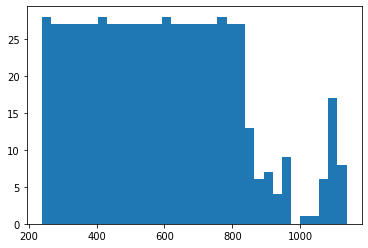

In [5]:
# n : 각 구간에 포함된 값의 갯수 혹은 빈도 리스트
# bins : 구간의 경계값 리스트
# patches : 각 구간을 그리는 matplotlib patch 객체 리스트
n, bins, patches = plt.hist(check_list, bins=int(y_len/100 * 0.8))
plt.show()

In [7]:
min_x = np.min(check_list)
max_x = np.max(check_list)
print(f'min x poin t: {min_x}')
print(f'max x poin t: {max_x}')

min x poin t: 240
max x poin t: 1136


In [8]:
crop_img = img[:, min_x:max_x]

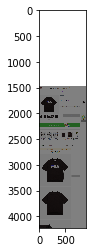

In [9]:
plt.imshow(crop_img)

# 실질적으로 함수를 정의하고 사용하는 부분

## 열을 잘라주는 def

In [49]:
def crop_col_img(img_path):
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img_binary = cv2.threshold(img_gray, 127, 255, 0)
    
    x_len = img_binary.shape[1]
    y_len = img_binary.shape[0]

    threshold = int(y_len/100 * 0.5)

    check_list = []
    for x in range(x_len):
        not_white = 0
        for y in range(0, y_len, 100):
            if img_binary[y][x] != 255:
                not_white += 1
        if not_white > 3:
            check_list.append(x)
    x_min_point = np.min(check_list)
    x_max_point = np.max(check_list)
    crop_img = img[:, x_min_point:x_max_point]
    return crop_img

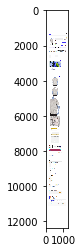

In [50]:
#원본
plt.imshow(cv2.imread('./img/male_size/screen_shot_136.png'))

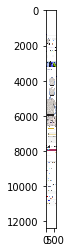

In [51]:
plt.imshow(crop_col_img('./img/male_size/screen_shot_136.png'))

## 행을 기준으로 분리해주는 def

In [52]:
# split function
def split_img(img):

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    y_shape = img_gray.shape[0]
    x_shape = img_gray.shape[1]
    split_point_y = []
    line = 0
    for y in range(y_shape):
        ck_color = 0
        for x in range(0, x_shape, 15):
            # 한줄이 다 같은색이면
            if img_gray[y][x] == img_gray[y][0]:
                ck_color += 1
            else :
                line = 0
                break;
        if ck_color >= int(x_shape/15):
            line += 1 
            if line == 30:
                split_point_y.append(y)
                line = 0
    split_img_list = []

    start = 0
    for point in split_point_y:
        if (point - start) > 100:
            split_img_list.append(img[start:point][:])
        start = point
    if (point - start) > 100:
        split_img_list.append(img[start:][:])    

    print('len(split_point_y) : {} '.format(len(split_point_y)))
    print('len(split_img_list) : {} '.format(len(split_img_list)))

    return split_img_list

In [53]:
img = crop_col_img('./img/male_size/screen_shot_136.png')
split_img = split_img(img)

len(split_point_y) : 129 
len(split_img_list) : 21 


## 적당히 concat

In [54]:
def img_concat(split_img_list):
    sum_len = 0
    concat_img_list = []
    over_1500_img = []
    for img in split_img_list:
        concat_img_list.append(img)
        sum_len = sum_len + img.shape[0]
        # 1500보다 길면 지금까지의 append된 이미지를 concat
        if sum_len > 1500:
            over_1500_img.append(np.concatenate(concat_img_list, axis=0))
            concat_img_list = []
            sum_len = 0
        else:
            continue
    # 딱 1500별로 잘리는 케이스 아니면 나머지에 더해줌
    if len(concat_img_list) != 0:
        over_1500_img.append(np.concatenate(concat_img_list, axis=0))
    return over_1500_img

In [55]:
concat_img = img_concat(split_img)

C:\ProgramData\Anaconda3\envs\tmh_env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


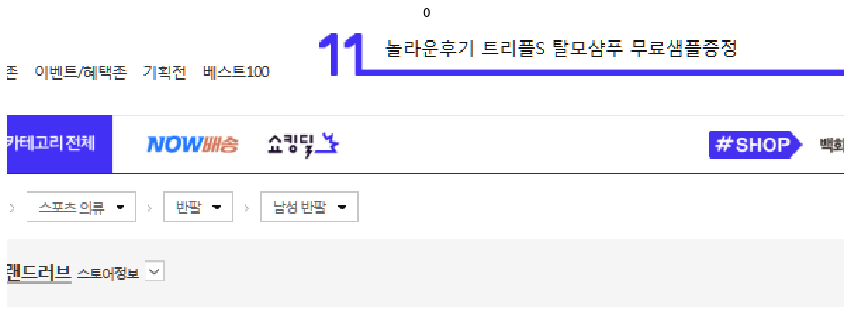

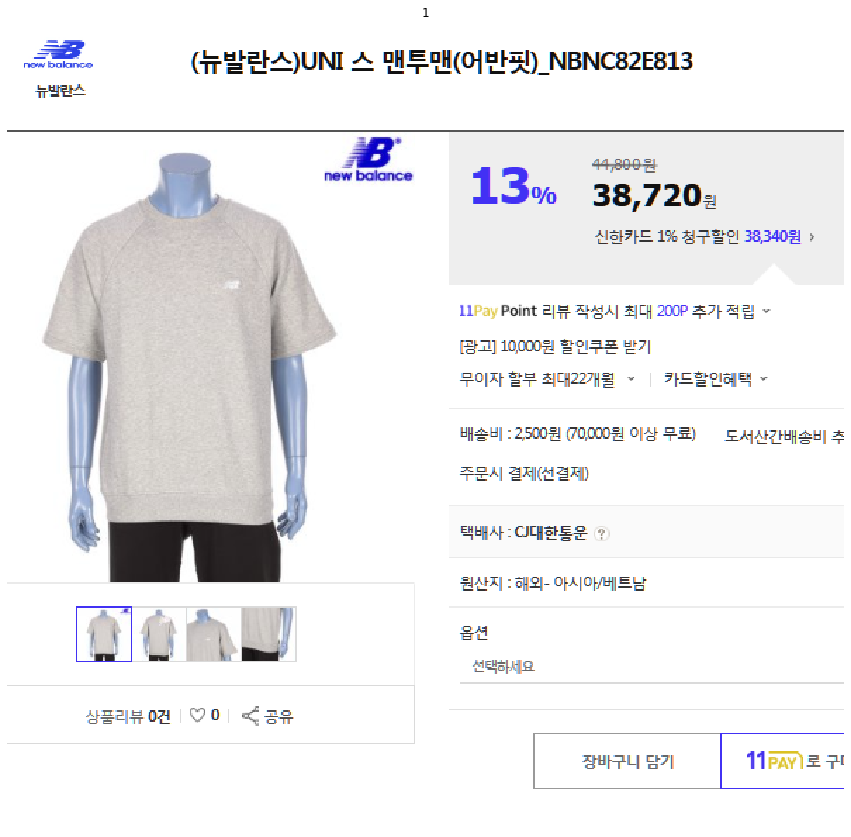

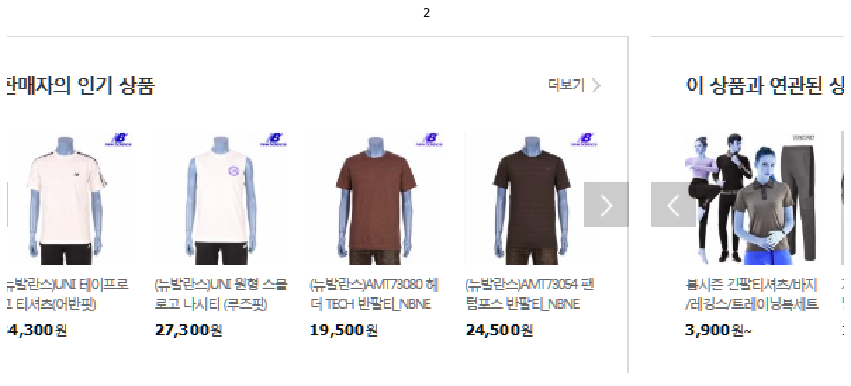

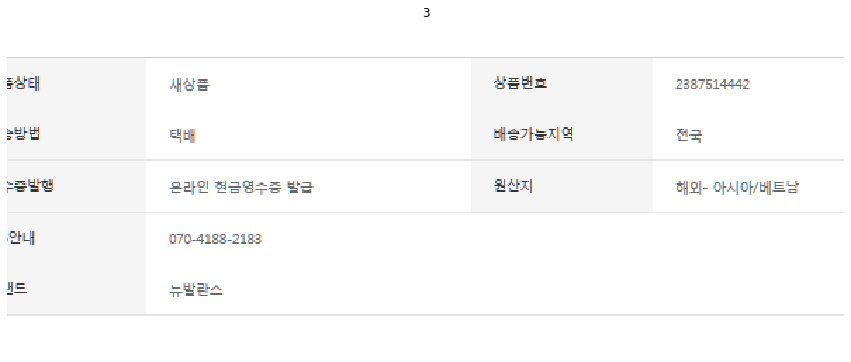

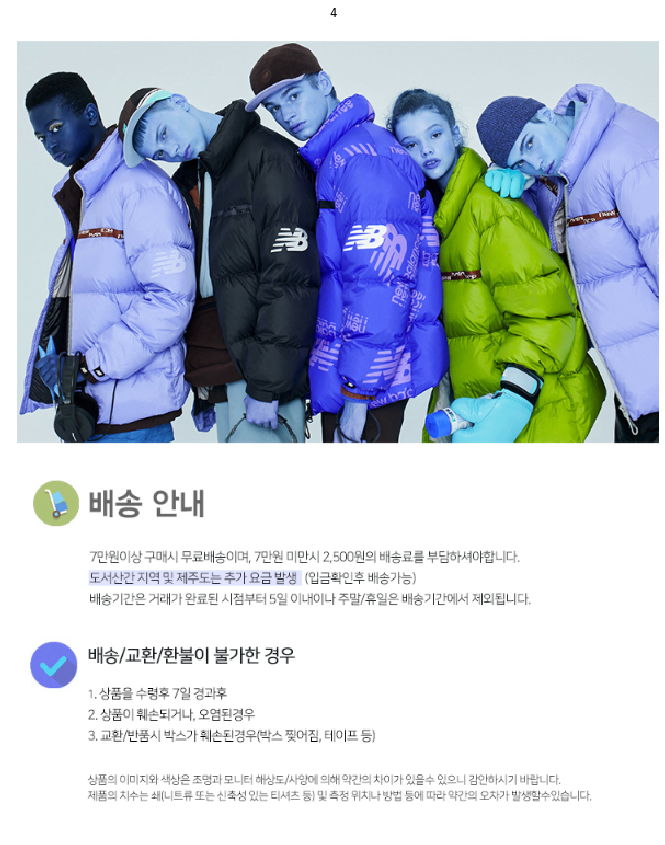

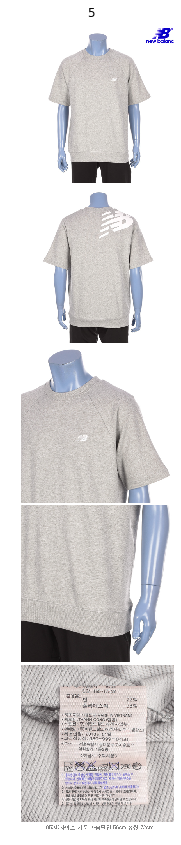

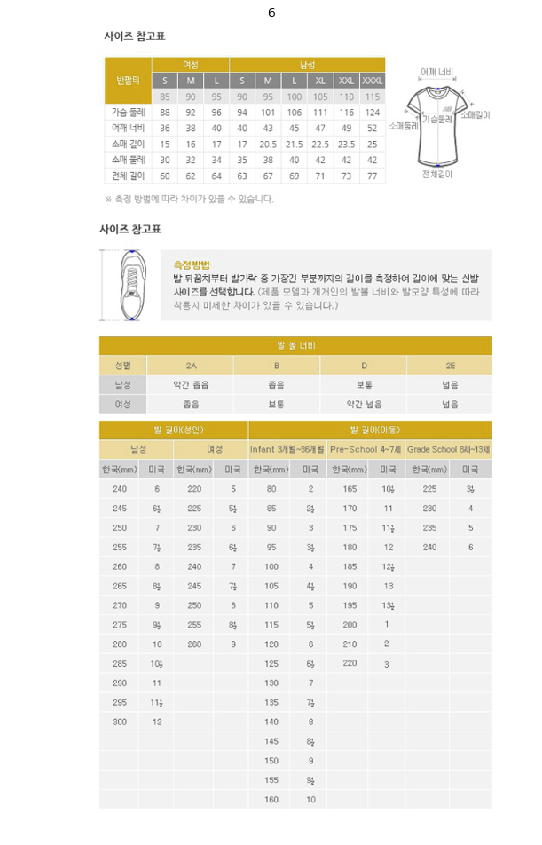

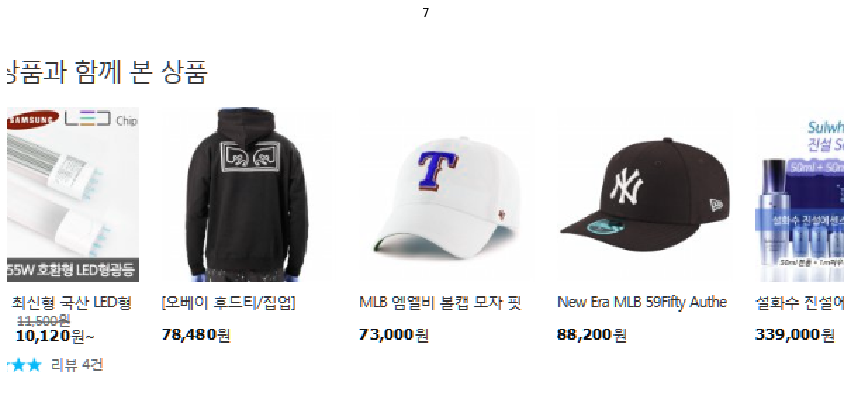

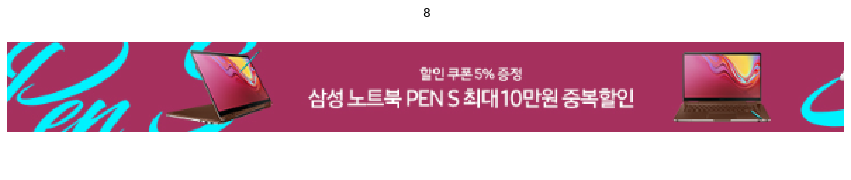

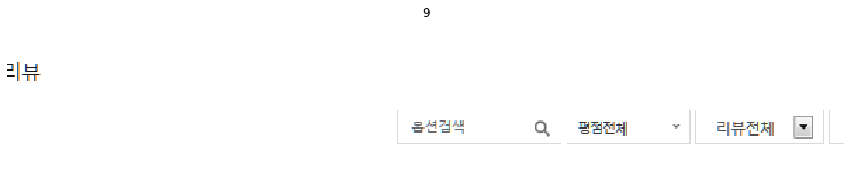

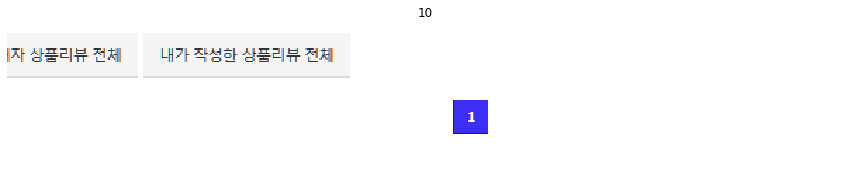

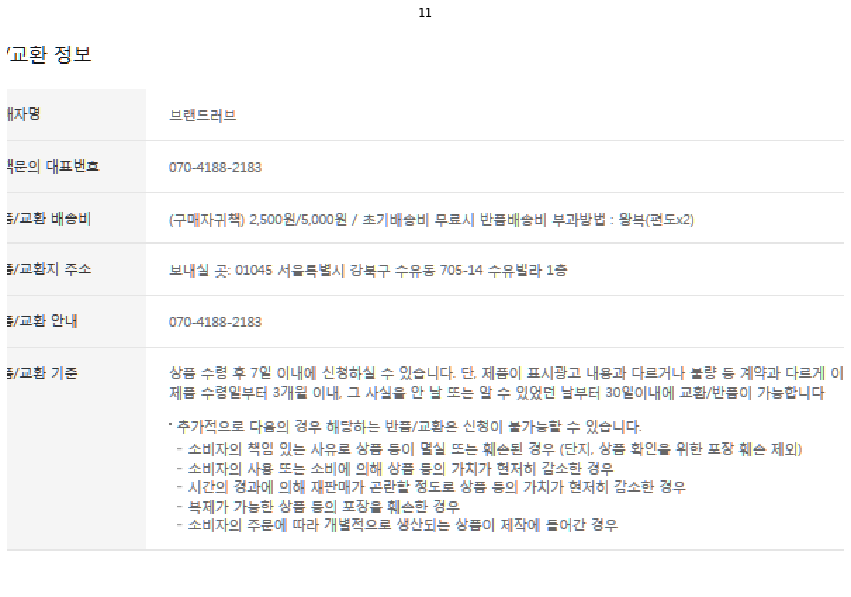

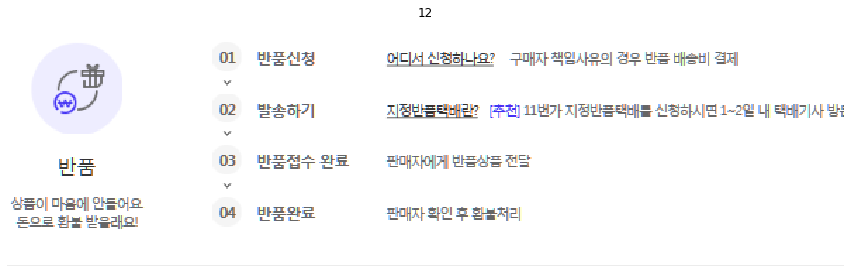

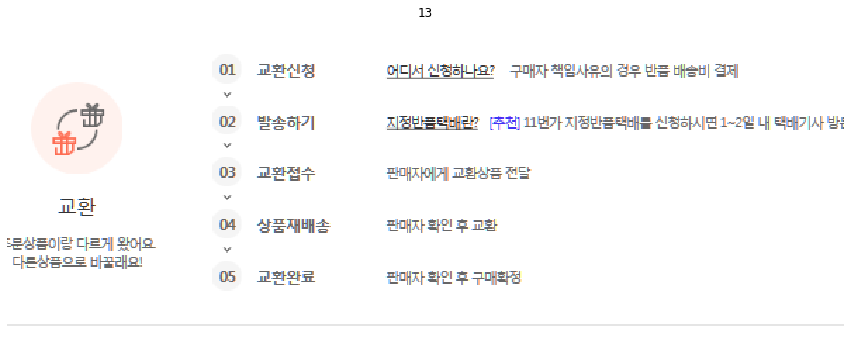

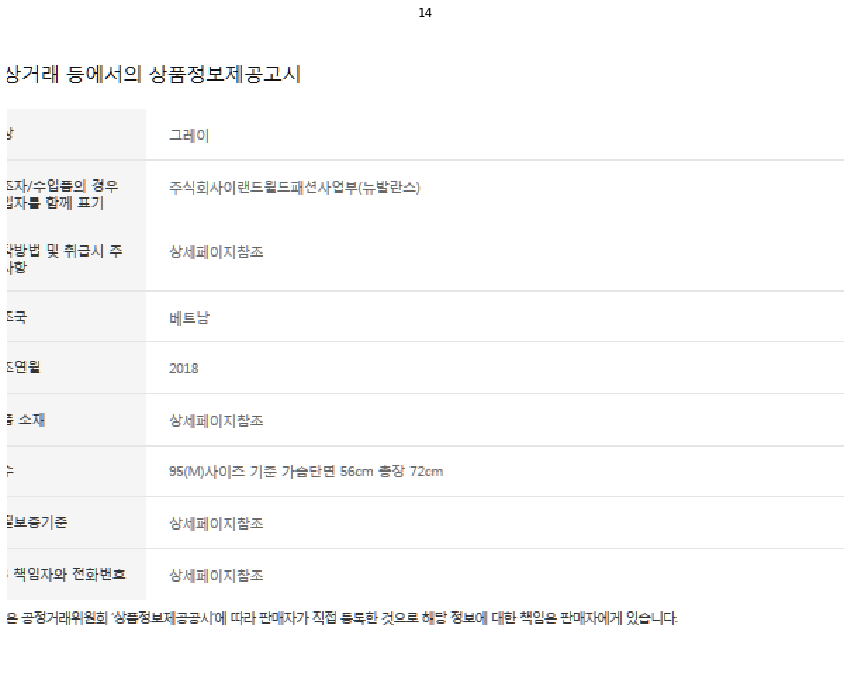

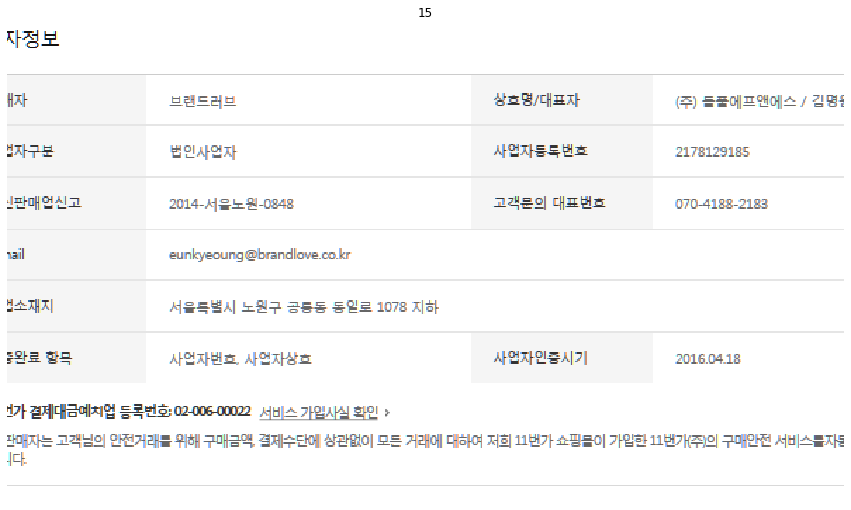

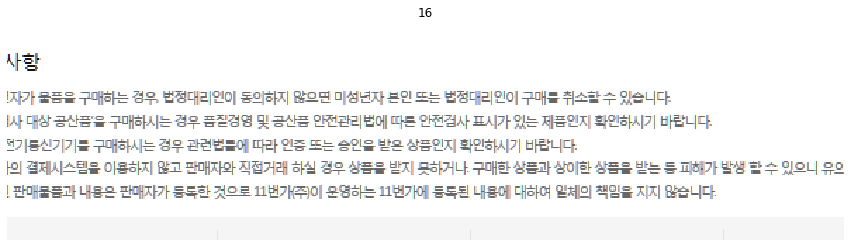

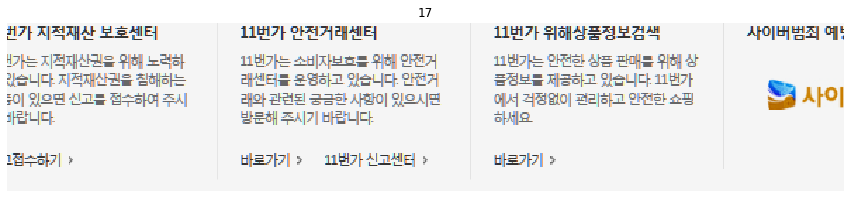

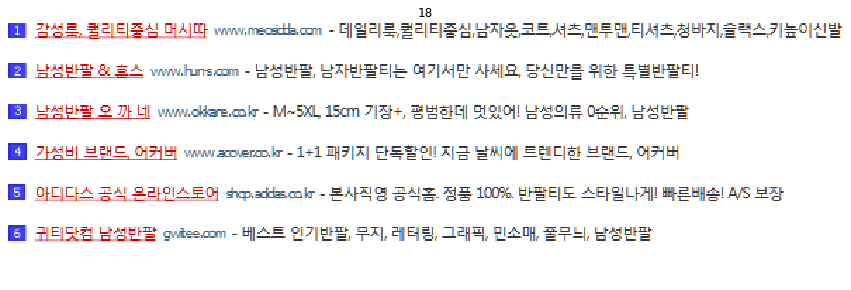

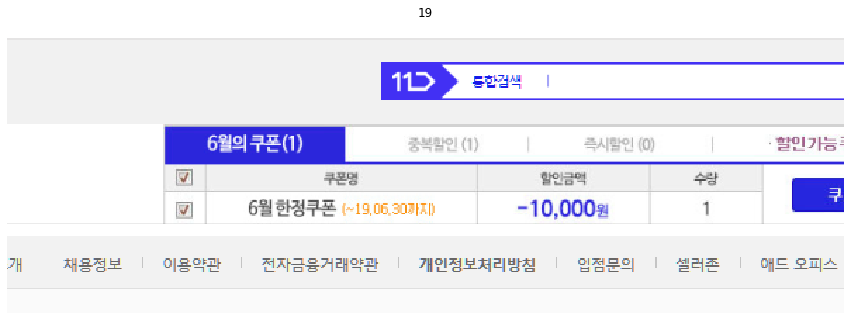

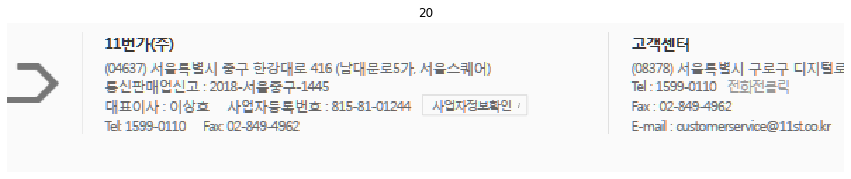

In [56]:
for idx,img in enumerate(split_img):
    fig, axes = plt.subplots(1, 1, figsize=(15,15))
    plt.title(f'{idx}')
    axes.imshow(img)
    axes.axis('off')

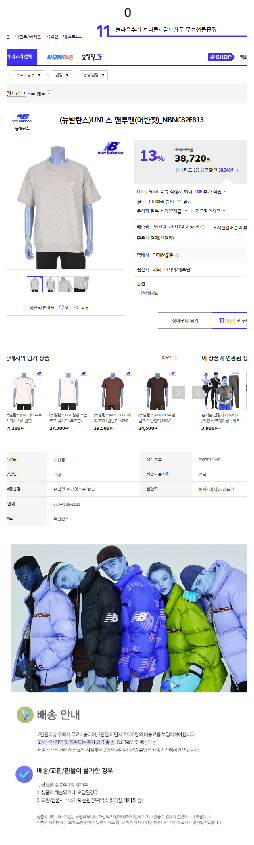

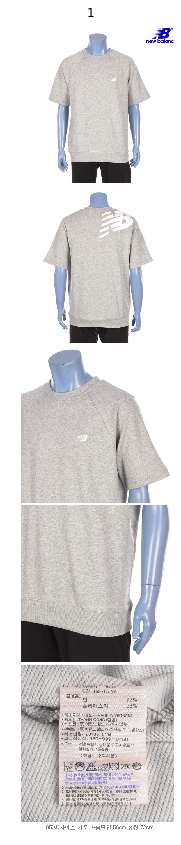

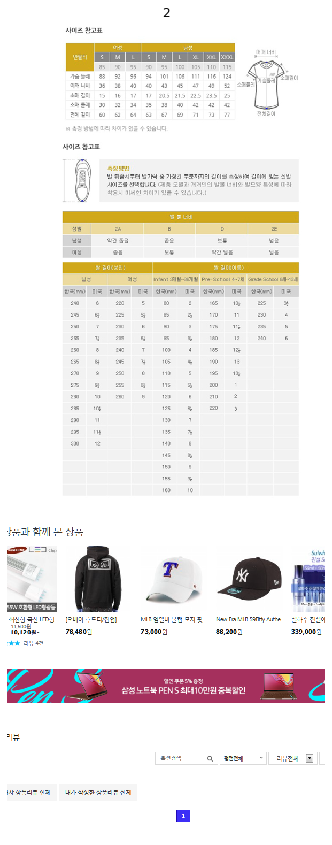

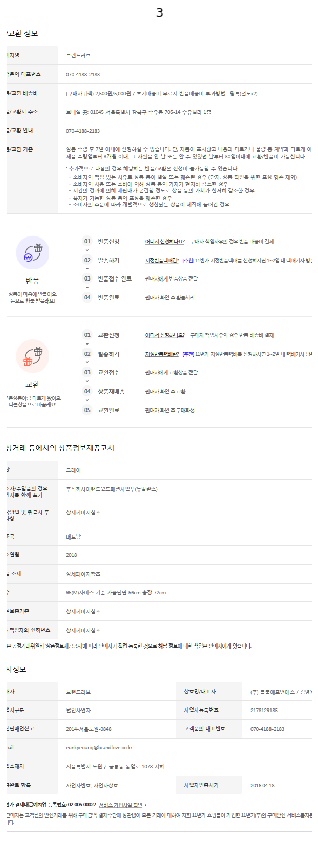

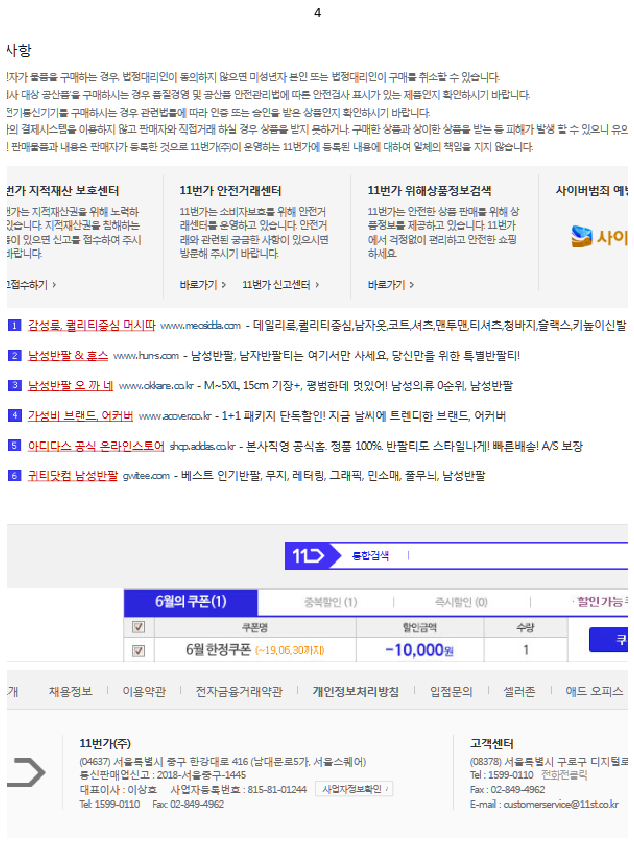

In [57]:
for idx,img in enumerate(concat_img):
    fig, axes = plt.subplots(1, 1, figsize=(15,15))
    plt.title(f'{idx}')
    axes.imshow(img)
    axes.axis('off')

## 경로 돌면서 행과 열로 crop하고 적당히 concat해서 파일로 저장

In [58]:
import os

In [78]:
def image_preprocessing(working_path, saving_path):
    img_list = os.listdir(working_path)
    for i,img in enumerate(img_list):
        print(f'{i}/{len(img_list)} split...')
        if '.png' in img or 'jpg' in img:
            img_name = img.split('.')[0]
            img_path = os.path.join(working_path, img)
            print(f'img_name : {img_name}, img_path  : {img_path}')
            # 양쪽 여백 잘라주고
            crop_img = crop_col_img(img_path)
            print(type(crop_img))
            # 이미지 분리
            split_img_list = split_img(crop_img)
            # 적당히 붙여주기
            concat_img_list = img_concat(split_img_list)
            for idx,concat_img in enumerate(concat_img_list):
                concat_img_name = f'{img_name}_{idx}.jpg'
                cv2.imwrite(os.path.join(saving_path,concat_img_name), concat_img)  

In [79]:
working_path = './img/male_size/'
saving_path = './img/split_size'

In [80]:
%%time
image_preprocessing(working_path, saving_path)

0/951 split...
img_name : screen_shot_1, img_path  : ./img/male_size/screen_shot_1.png
<class 'numpy.ndarray'>


TypeError: 'list' object is not callable

In [83]:
img = crop_col_img('./img/male_size/screen_shot_1.png')

In [86]:
a = []

In [90]:
img.shape

(18668, 1007, 3)

In [94]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

y_shape = img_gray.shape[0]
x_shape = img_gray.shape[1]
split_point_y = []
line = 0
for y in range(y_shape):
    ck_color = 0
    for x in range(0, x_shape, 15):
        # 한줄이 다 같은색이면
        if img_gray[y][x] == img_gray[y][0]:
            ck_color += 1
        else :
            line = 0
            break;
    if ck_color >= int(x_shape/15):
        line += 1 
        if line == 30:
            split_point_y.append(y)
            line = 0
split_img_list = []


start = 0
for point in split_point_y:
    if (point - start) > 100:
        split_img_list.append(img[start:point][:])
    start = point
if (point - start) > 100:
    split_img_list.append(img[start:][:])    

print('len(split_point_y) : {} '.format(len(split_point_y)))
print('len(split_img_list) : {} '.format(len(split_img_list)))


len(split_point_y) : 230 
len(split_img_list) : 33 


In [95]:
split_img_list

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [87]:
a = split_img(img)

TypeError: 'list' object is not callable